gerekli kütüphaneleri dahil etme

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder

veriyi dahil etme

In [3]:
df = pd.read_csv("/content/Melbourne_housing_FULL.csv")
####### data     df
#######   df     df_copy

In [4]:
# ham veriye daha sonradan ulaşmak için
df_copy = df.copy()
# ilk 5 veriyi ekrana basma
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
# veri bilgisine ulaşma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

veriler hakkında detaylı bilgi, size,shape, dimension

In [6]:
print(f'shape : {df_copy.shape}\n'
      f'size : {df_copy.size}\n'
      f'dimension: {df_copy.ndim}')
# verinin satır, sütun sayısı, bunlaın çarpımı ve boyutu:

shape : (34857, 21)
size : 731997
dimension: 2


In [23]:
# veriyi analiz ederek istatistiksel bilgilere göz atma
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


In [24]:
# veri tiplerini kontrol etme
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [25]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.8014,144.9958,2,4019.0
1,0,32512,2,0,1480000.0,2,33,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.7996,144.9984,2,4019.0
2,0,15389,2,0,1035000.0,2,33,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
3,0,9768,3,2,NaN,7,296,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.8114,145.0116,2,4019.0
4,0,25128,3,0,1465000.0,5,33,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0


duplicated verileri kontrol etme, tespiti ve kaldırma işlemleri

In [26]:
# duplicated verileri kontrol etme
df_copy.duplicated().sum()
dupData = df_copy.duplicated().sum()

In [27]:
# duplicated veriye erişmek için
df_copy.loc[df_copy.duplicated(keep=False), :]
# bu 2 satır da birebir aynı, veriler şansen mi aynı?

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,244,2330,3,1,NaN,5,155,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,15,-37.82678,145.16777,0,4973.0
15858,244,2330,3,1,NaN,5,155,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,15,-37.82678,145.16777,0,4973.0


In [28]:
# Yinelenen verileri kaldır
df.drop_duplicates(inplace=True)
# Kaldırdıktan sonraki hali verileri tekrar görme
print("kaldırma işleminden sonra yineleyen veri sayısı:", df.duplicated().sum())

kaldırma işleminden sonra yineleyen veri sayısı: 0


eksik değer tespiti

In [7]:
# eksik değer kontrolü
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# İki ondalık hane göstermek için
#pd.options.display.float_format = '{:.2f}'.format
# min-ort deger vs uyumsuzluk var mı bakmak için
df_copy.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [29]:
# Tüm kolonların mod değerlerini aldık
#sutun_modlari = df_copy.mode().iloc[0]
#sutun_modlari

In [30]:
# mod değerleri aldıktan sonra moda göre eksik değerleri doldurma
#for sutun in df_copy.columns:
 #   df_copy[sutun].fillna(sutun_modlari[sutun], inplace=True)

In [31]:
# son hali için isnull kontrolü
#df_copy.isnull().sum()

In [33]:
df_copy
#########

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,29458,2,0,NaN,6,155,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,31,-37.80140,144.99580,2,4019.0
1,0,32512,2,0,1480000.0,2,33,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,31,-37.79960,144.99840,2,4019.0
2,0,15389,2,0,1035000.0,2,33,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,31,-37.80790,144.99340,2,4019.0
3,0,9768,3,2,NaN,7,296,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,31,-37.81140,145.01160,2,4019.0
4,0,25128,3,0,1465000.0,5,33,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,31,-37.80930,144.99440,2,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,348,5862,4,0,1480000.0,0,152,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,16,-37.81053,144.88467,6,6543.0
34853,348,16982,2,0,888000.0,5,321,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,16,-37.81551,144.88826,6,6543.0
34854,348,7350,2,1,705000.0,2,152,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,16,-37.82286,144.87856,6,6543.0
34855,348,5421,3,0,1140000.0,5,370,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,6,6543.0


In [34]:
# ----Aykırı deerleri tespit için ama bizde nan yerine 6000000 yazıyor
# Aykırı verileri kontrol etmek için kullanılacak sütunlar
import numpy as np

# Aykırı değerleri kontrol etmek için kullanılacak sütunlar
columns_to_check = ['Landsize', 'BuildingArea']

# Aykırı verileri kontrol etme işlemi
for column in columns_to_check:
    z_scores = np.abs((df_copy[column] - df_copy[column].mean()) / df_copy[column].std())
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.

    # Aykırı verileri belirle
    is_outlier = z_scores > threshold

    # Aykırı verileri ekrana yazdır
    print(f"Aykırı veriler ({column} sütunu):")
    print(df_copy[is_outlier])


Aykırı veriler (Landsize sütunu):
       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
1198       23    32953      3     0  2000000.0       7      165  28/08/2016   
3539       88    22529      3     2   950000.0       2      155   4/03/2017   
6195      206     9178      2     2   352500.0       2      370  18/03/2017   
6591      209    24171      2     2   495000.0       2       42  18/03/2017   
7786      260    20980      2     2  1340000.0       7       69   3/12/2016   
7894      260     3938      2     1        NaN       5      198  24/09/2016   
8599      265     6660      3     0   572000.0       2      279  23/04/2016   
9200      288    23623      1     2   315000.0       0      370   3/12/2016   
9215      288    26355      2     2   978500.0       2      370   4/03/2017   
9220      288    28770      2     2        NaN       8       27   4/06/2016   
9271      288    15692      2     2        NaN       0       10  12/11/2016   
9358      288    2

In [35]:
# Aykırı verileri temizlemek için kullanılacak sütunlar
columns_to_clean = ['Landsize', 'BuildingArea']
# abs mutlak degeri
# Aykırı veri temizleme işlemi

for column in columns_to_clean:
    z_scores = np.abs((df_copy[column] - df_copy[column].mean()) / df_copy[column].std())
    # ortalama degere olan uzaklıgı z_score değişkenine atayarak bulduk
    threshold = 3  # Aykırı değerlerin z-puanı bu eşik değerin üzerinde ise kabul edilecektir.
    df_copy = df_copy[z_scores <= threshold]
    # ortalamadan 3 standart sapma uzaklıkta olduğu anlamına gelir

In [37]:
categorical_columns = ['Bathroom', 'Car']  # Eksik değerleri kontrol etmek istediğiniz sütunlar

# Eksik değerleri kontrol etme ve doldurma işlemi
for column in categorical_columns:
    if df_copy[column].isnull().any():  # Eğer sütunda eksik değer varsa
        mode_value = df_copy[column].mode().iloc[0]  # Mode (moda) değerini hesapla
        df_copy[column].fillna(mode_value, inplace=True)  # Eksik değerleri mode ile doldur

# Eksik değerleri doldurulmuş veriyi gözlemle
print(df_copy)


       Suburb  Address  Rooms  Type      Price  Method  SellerG        Date  \
2           0    15389      2     0  1035000.0       2       33   4/02/2016   
4           0    25128      3     0  1465000.0       5       33   4/03/2017   
6           0    27096      4     0  1600000.0       7      227   4/06/2016   
7           0     8331      4     0        NaN       4      227   6/08/2016   
11          0     5635      3     0  1876000.0       2      227   7/05/2016   
...       ...      ...    ...   ...        ...     ...      ...         ...   
34849     343    20662      3     0   570000.0       5      276  24/02/2018   
34850     343     7747      3     0        NaN       5      173  24/02/2018   
34853     348    16982      2     0   888000.0       5      321  24/02/2018   
34854     348     7350      2     1   705000.0       2      152  24/02/2018   
34856     348    17743      2     0  1020000.0       0      276  24/02/2018   

       Distance  Postcode  ...  Bathroom  Car  Land

In [39]:
df_copy.dropna(axis=0, inplace=True)

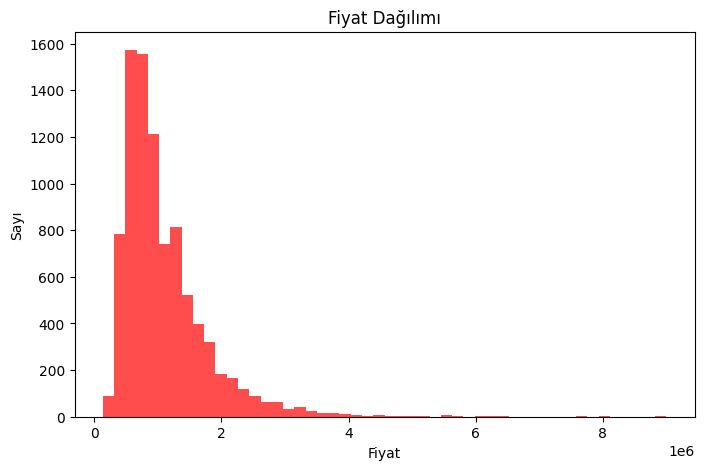

In [41]:
import matplotlib.pyplot as plt

# Fiyat değişkeninin histogramını oluşturma
plt.figure(figsize=(8, 5))
plt.hist(df['Price'], bins=50, color='red', alpha=0.7)
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.title('Fiyat Dağılımı')

# Ekrana çizim yapma
plt.show()


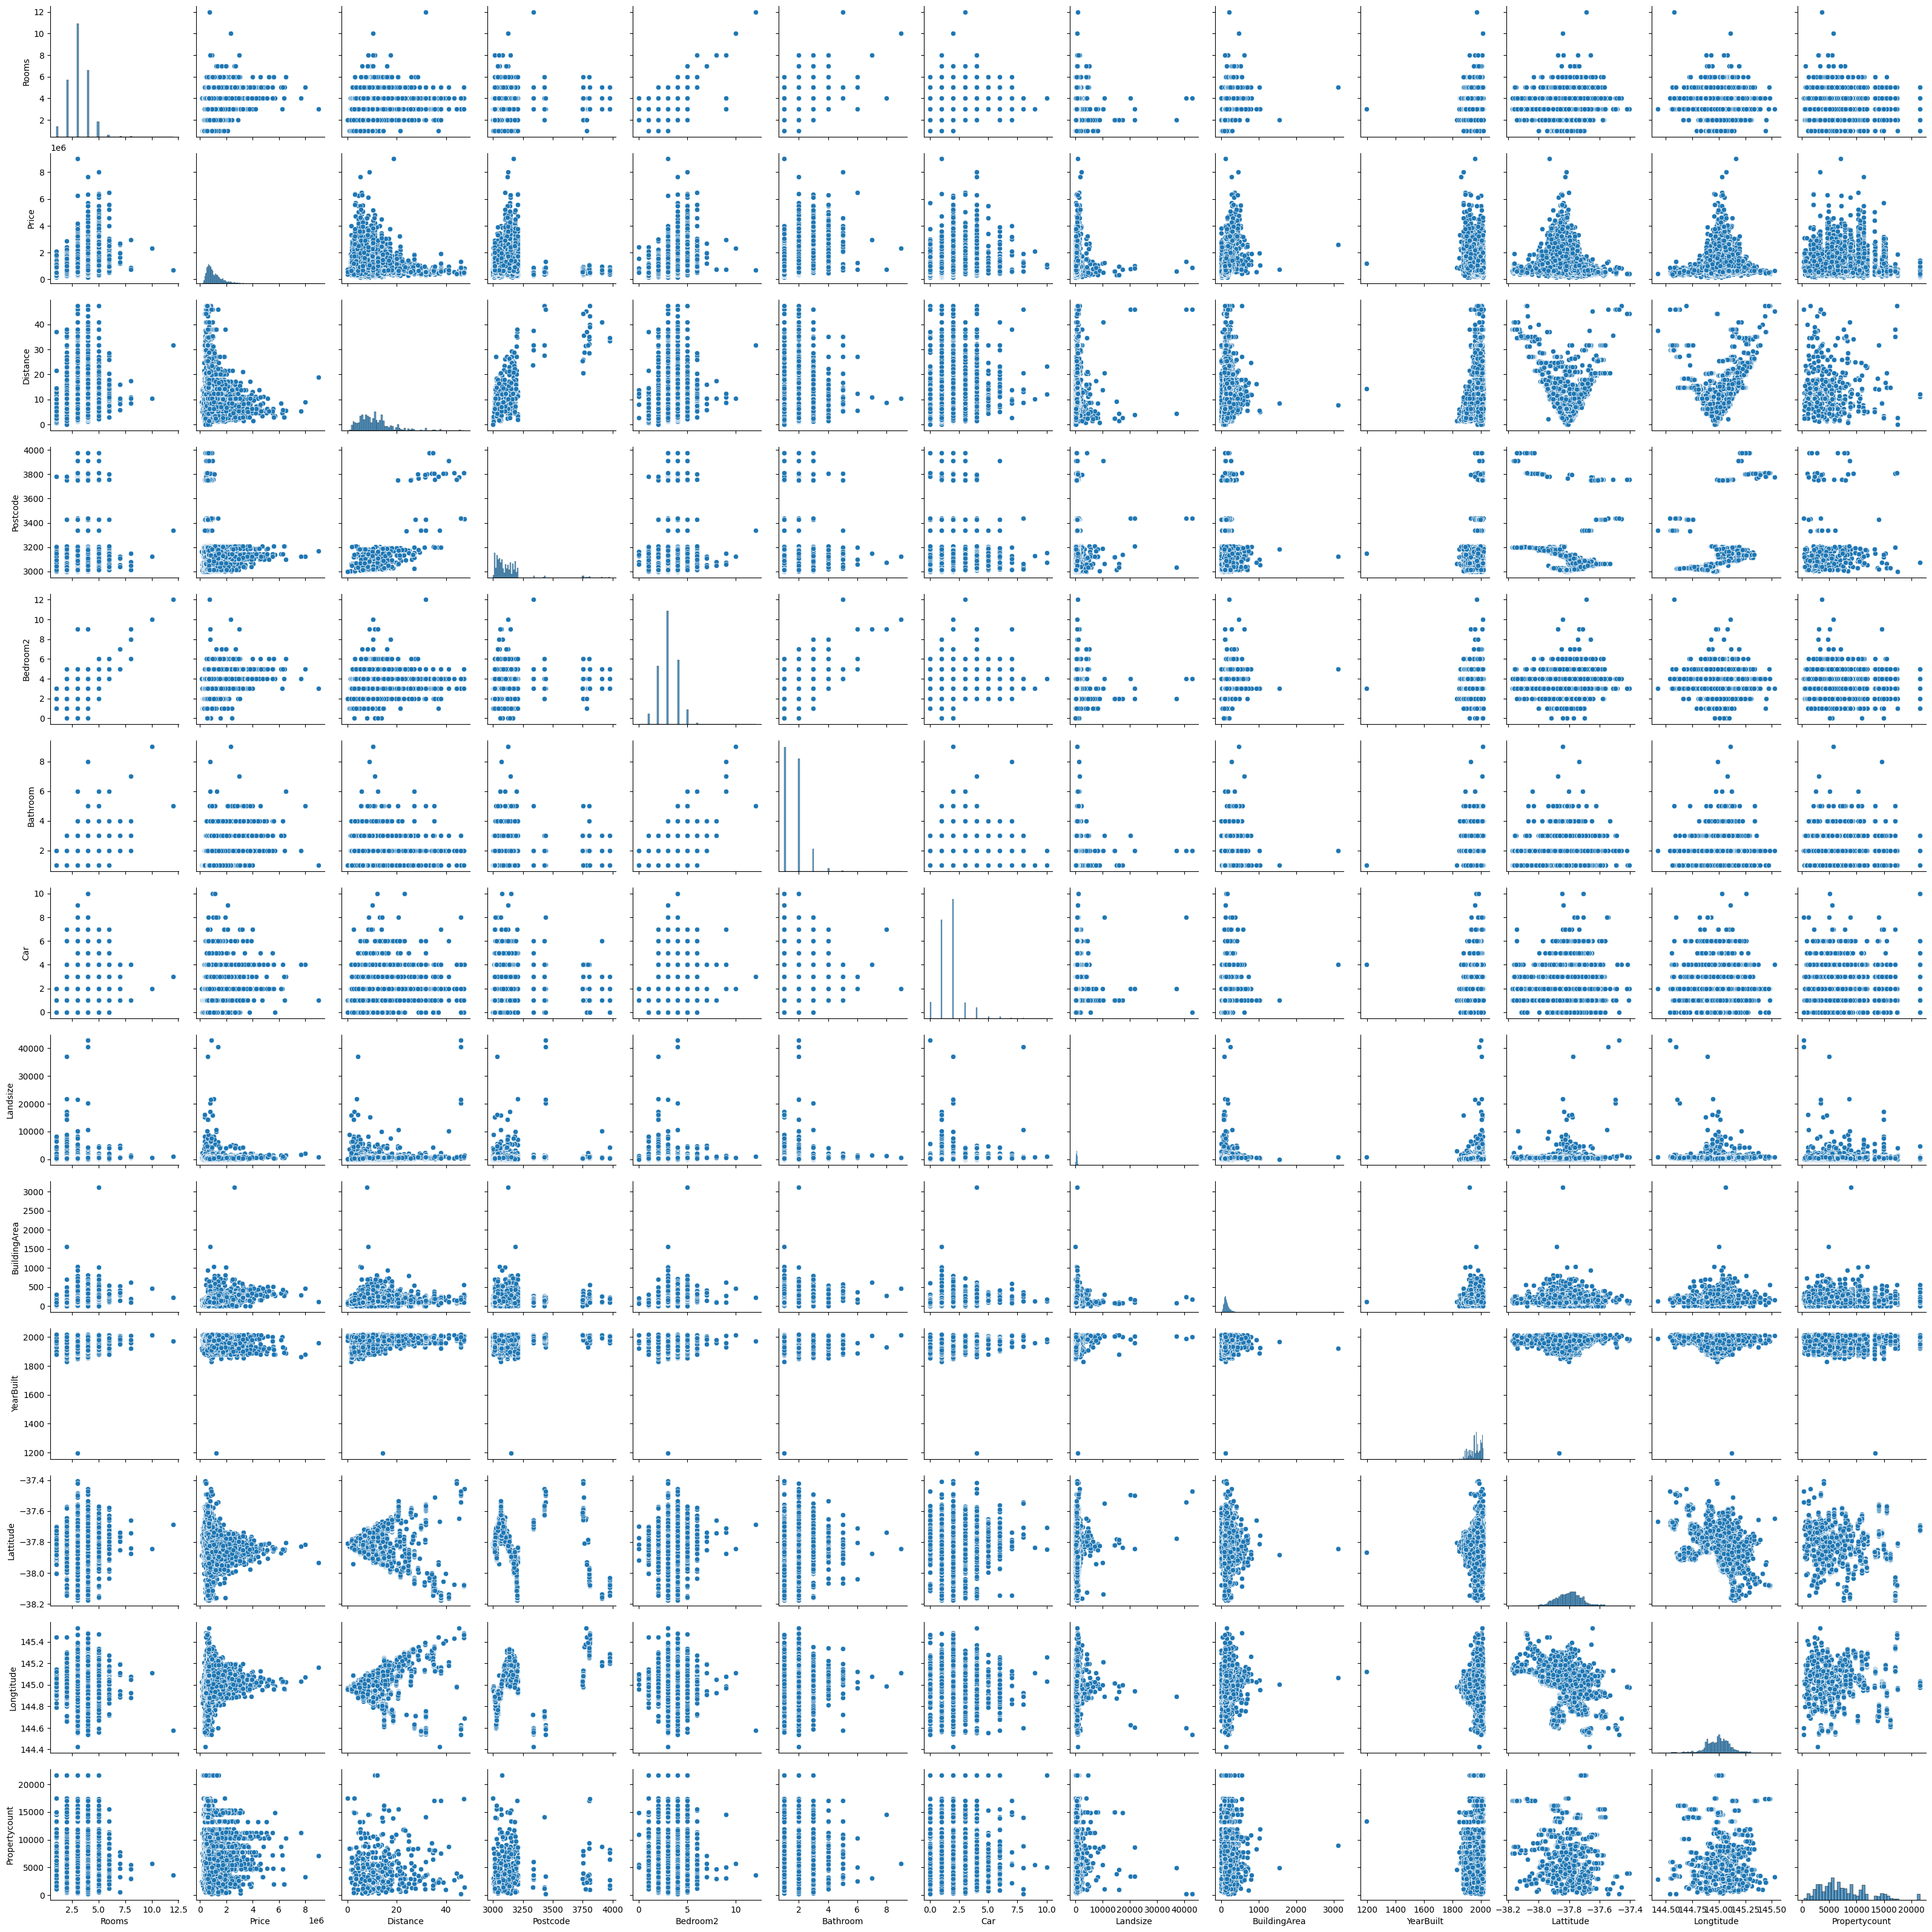

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Tüm sayısal değişkenlerin ve fiyat değişkeninin çift grafik (pair plot) gösterimi
sns.pairplot(df[numerical_columns])
plt.show()


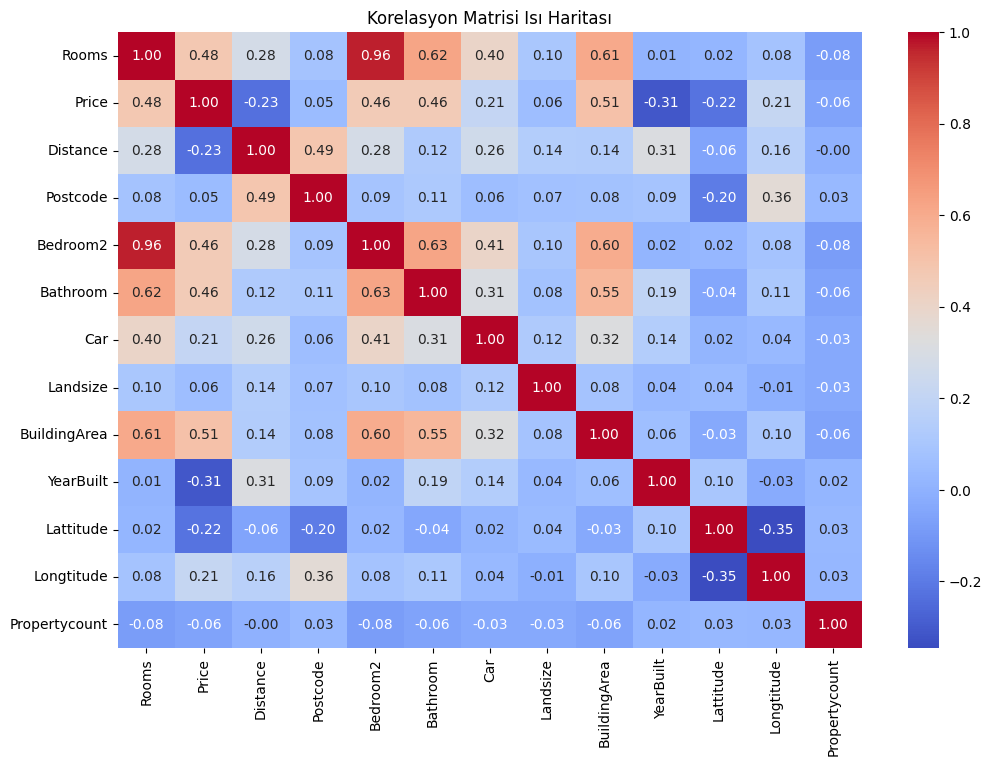

In [43]:
# Sayısal verileri seç
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Korelasyon matrisini hesapla
corr_matrix = df[numeric_features].corr()

# Korelasyon matrisini ısı haritası olarak göster
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()


In [44]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluştur
label_encoder = LabelEncoder()

# Kategorik değişkenleri dönüştürme için sütun adlarını belirt
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

# Her bir kategorik sütunu dönüştür
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [45]:
import pandas as pd

# One-Hot Encoding ile belirtilen kategorik değişkenleri dönüştürme
categorical_columns = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']

# Veri çerçevesini One-Hot Encoding ile güncelle
df = pd.get_dummies(df, columns=categorical_columns)


In [46]:
# Adım 1: Bağımsız değişkenler (X) ve Bağımlı değişken (Y) belirleme
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numerical_columns]
y = df['Price']

# Adım 2: Veriyi Eğitim ve Test verilerine bölelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Modellerin tanımlandığı bir sözlük oluşturun
model_dict = {
    'Lasso Model': {
        'model_instance': Lasso()
    },
    'Linear Regression Model': {
        'model_instance': LinearRegression()
    },
    'Ridge Model': {
        'model_instance': Ridge()
    },
    'ElasticNet Model': {
        'model_instance': ElasticNet()
    },
    'K-Neighbors Regression Model': {
        'model_instance': KNeighborsRegressor()
    },
    'Random Forest Regression Model': {
        'model_instance': RandomForestRegressor()
    },
    'Gradient Boosting Regression Model': {
        'model_instance': GradientBoostingRegressor()
    },
    'AdaBoost Regression Model': {
        'model_instance': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# Her bir modeli eğitip değerlendirme işlemi yapabilirsiniz
for model_name, model_info in model_dict.items():
    model_instance = model_info['model_instance']
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    model_info['mae'] = mae
    model_info['mse'] = mse
    model_info['rmse'] = rmse
    model_info['r2'] = r2

# Modellerin performansını karşılaştırabilirsiniz
for model_name, model_info in model_dict.items():
    print(f"{model_name} - MAE: {model_info['mae']}, MSE: {model_info['mse']}, RMSE: {model_info['rmse']}, R2: {model_info['r2']}")


Lasso Model - MAE: 3.139648961162046e-06, MSE: 1.6821645349957395e-11, RMSE: 4.1014199187546495e-06, R2: 1.0
Linear Regression Model - MAE: 1.645725036062996e-10, MSE: 5.479321791979787e-20, RMSE: 2.34079511960782e-10, R2: 1.0
Ridge Model - MAE: 3.2467630883538415e-10, MSE: 3.1650114960776337e-19, RMSE: 5.625843488826928e-10, R2: 1.0
ElasticNet Model - MAE: 1.3221386313036135e-06, MSE: 2.983051484105602e-12, RMSE: 1.7271512626592965e-06, R2: 1.0
K-Neighbors Regression Model - MAE: 615.9391451068616, MSE: 3169169.6601349832, RMSE: 1780.2161835392305, R2: 0.9999917514944193
Random Forest Regression Model - MAE: 342.1741619797526, MSE: 1563920.3942749158, RMSE: 1250.5680286473487, R2: 0.999995929531239
Gradient Boosting Regression Model - MAE: 4330.265749983773, MSE: 39792209.12167885, RMSE: 6308.106619396889, R2: 0.9998964314649551
AdaBoost Regression Model - MAE: 76202.8867338688, MSE: 9774198142.73002, RMSE: 98864.54441674234, R2: 0.974560362311488


In [48]:
# Her bir modeli eğitip değerlendirme işlemi yapma
model_results = []

for model_name, model_info in model_dict.items():
    model_instance = model_info['model_instance']
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    model_info['mae'] = mae
    model_info['mse'] = mse
    model_info['rmse'] = rmse
    model_info['r2'] = r2
    model_results.append((model_name, mae, mse, rmse, r2))

# Modellerin Performansını Karşılaştırma
results_df = pd.DataFrame(model_results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
best_model = results_df.sort_values(by='MAE').iloc[0]

print("Model Performansı:")
print(results_df)
print("\nEn İyi Model:")
print(best_model)


Model Performansı:
                                Model           MAE           MSE  \
0                         Lasso Model  3.139649e-06  1.682165e-11   
1             Linear Regression Model  1.645725e-10  5.479322e-20   
2                         Ridge Model  3.246763e-10  3.165011e-19   
3                    ElasticNet Model  1.322139e-06  2.983051e-12   
4        K-Neighbors Regression Model  6.159391e+02  3.169170e+06   
5      Random Forest Regression Model  3.517176e+02  2.054930e+06   
6  Gradient Boosting Regression Model  4.330586e+03  3.979337e+07   
7           AdaBoost Regression Model  7.620289e+04  9.774198e+09   

           RMSE        R2  
0  4.101420e-06  1.000000  
1  2.340795e-10  1.000000  
2  5.625843e-10  1.000000  
3  1.727151e-06  1.000000  
4  1.780216e+03  0.999992  
5  1.433503e+03  0.999995  
6  6.308199e+03  0.999896  
7  9.886454e+04  0.974560  

En İyi Model:
Model    Linear Regression Model
MAE                          0.0
MSE                       